In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [4]:
data = pd.read_csv('covid_19_clean_complete.csv', parse_dates = ['Date'])
data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0,0,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0,0,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0,0,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0,0,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0,0,0


In [0]:
data.rename(columns={'Date':'date', 'Province/State':'state','Country/Region':'country','Lat':'lat',
                     'Long':'long','Confirmed':'confirmed',
                     'Deaths':'deaths','Recovered':'recovered'}, inplace=True)

In [0]:
data['active'] = data['confirmed'] - data['deaths'] - data['recovered']

In [7]:
top = data[data['date'] == data['date'].max()]
world = top.groupby('country')['confirmed','active','deaths'].sum().reset_index()
world.head()

,country,confirmed,active,deaths
0,Afghanistan,1463,1228,47
1,Albania,712,282,27
2,Algeria,3256,1358,419
3,Andorra,738,354,40
4,Angola,25,17,2


In [8]:
figure = px.choropleth(world, locations="country",locationmode='country names', color="active",hover_name="country",range_color=[1,1000],
                       color_continuous_scale="Peach",
                       title='Countries with Active Cases')
figure.show()

[Text(0, 0.5, 'Total Cases'), Text(0.5, 0, 'Dates')]

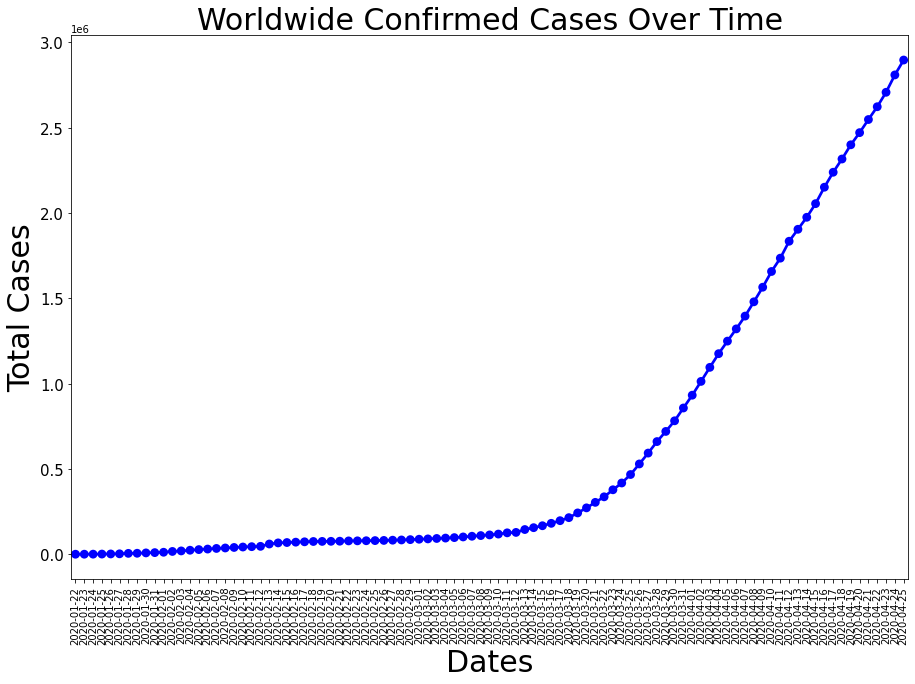

In [9]:
plt.figure(figsize=(15,10))
plt.xticks(rotation=90,fontsize=10)
plt.yticks(fontsize=15)
plt.xlabel('Dates',fontsize=30)
plt.ylabel('Total Cases',fontsize=30)
plt.title('Worldwide Confirmed Cases Over Time',fontsize=30)
total_cases = data.groupby('date')['date','confirmed'].sum().reset_index()
total_cases['date'] = pd.to_datetime(total_cases['date'])

ax = sns.pointplot(x=total_cases.date.dt.date, y=total_cases.confirmed, color='b')
ax.set(xlabel='Dates', ylabel='Total Cases')

In [0]:
top_actives = top.groupby(by = 'country')['active'].sum().sort_values(ascending=False).head(20).reset_index()

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

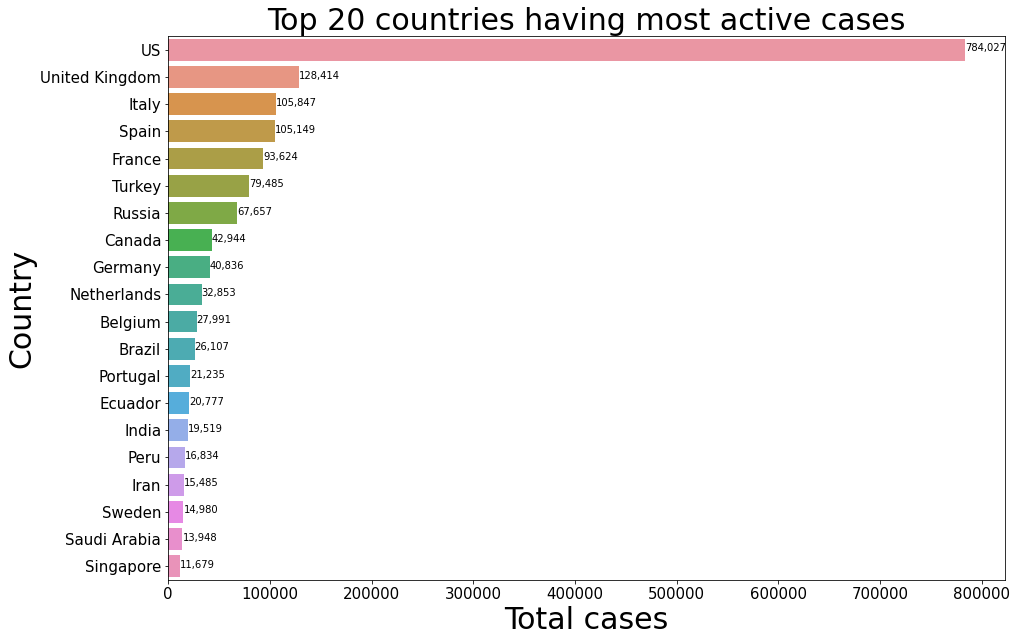

In [11]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total cases',fontsize=30)
plt.ylabel('Country',fontsize=30)
plt.title('Top 20 countries having most active cases',fontsize=30)
ax = sns.barplot(x=top_actives.active, y= top_actives.country)
for i, (value,name) in enumerate(zip(top_actives.active, top_actives.country)):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha='left', va='center')
ax.set(xlabel='Total cases', ylabel='Country')

In [0]:
top_deaths = top.groupby(by = 'country')['deaths'].sum().sort_values(ascending=False).head(20).reset_index()

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

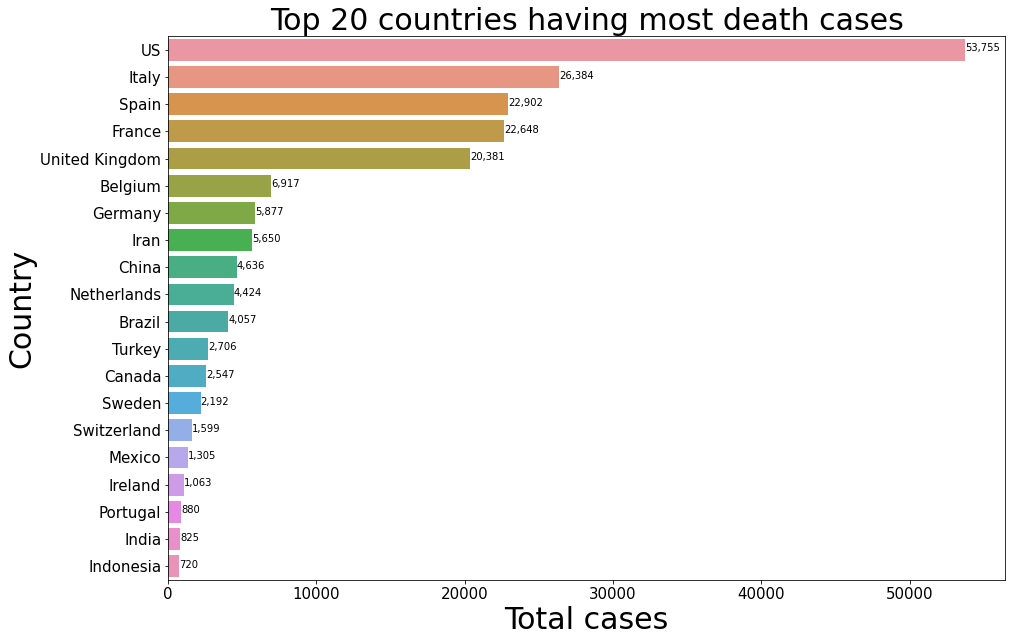

In [14]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total cases',fontsize=30)
plt.ylabel('Country',fontsize=30)
plt.title('Top 20 countries having most death cases',fontsize=30)
ax = sns.barplot(x=top_deaths.deaths, y= top_deaths.country)
for i, (value,name) in enumerate(zip(top_deaths.deaths, top_deaths.country)):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha='left', va='center')
ax.set(xlabel='Total cases', ylabel='Country')    

In [0]:
top_recovery = top.groupby(by = 'country')['recovered'].sum().sort_values(ascending=False).head(20).reset_index()

[Text(0, 0.5, 'Country'), Text(0.5, 0, 'Total cases')]

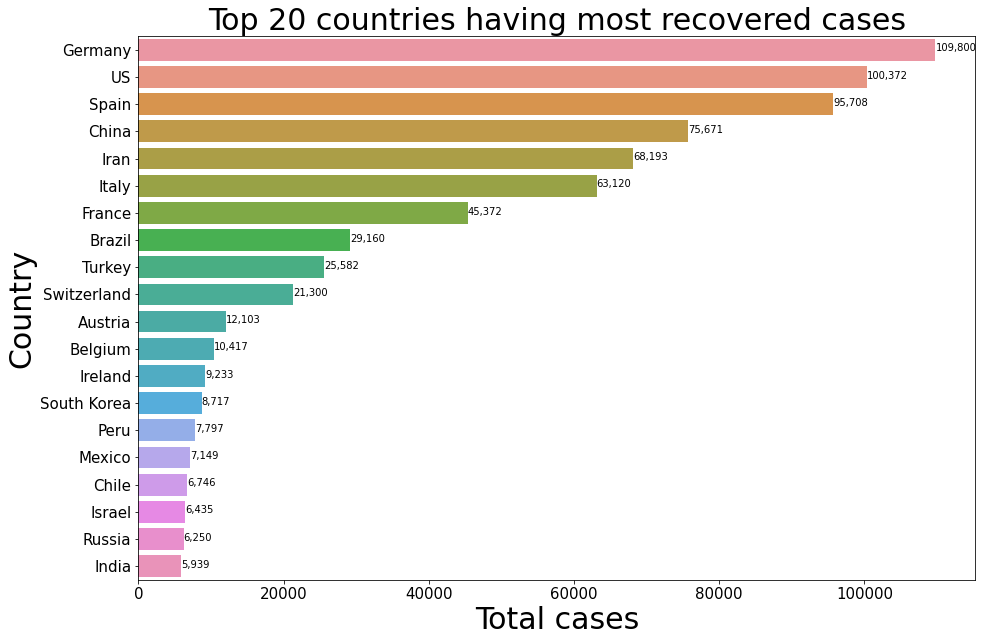

In [16]:
plt.figure(figsize=(15,10))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Total cases',fontsize=30)
plt.ylabel('Country',fontsize=30)
plt.title('Top 20 countries having most recovered cases',fontsize=30)
ax = sns.barplot(x=top_recovery.recovered, y= top_recovery.country)
for i, (value,name) in enumerate(zip(top_recovery.recovered, top_recovery.country)):
    ax.text(value, i-.05, f'{value:,.0f}', size=10, ha='left', va='center')
ax.set(xlabel='Total cases', ylabel='Country')   

In [17]:
df = pd.read_excel('covid_19_india.xlsx') 
df.head()

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1


In [0]:
df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']


In [19]:
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
print('Total number of active COVID-19 cases across India: ',total_active)
Tot_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Tot_Cases.style.background_gradient(cmap='Blues_r')

Total number of active COVID-19 cases across India:  512


,Total Active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


In [0]:
df = pd.read_csv('covid_19_clean_complete.csv', parse_dates = ['Date'])
df.rename(columns={'ObservationDate':'Date','Country/Region':'Country'}, inplace=True)

df_confirmed = pd.read_csv('time_series_covid_19_confirmed.csv')
df_recovered =pd.read_csv('time_series_covid_19_recovered.csv')
df_deaths = pd.read_csv('time_series_covid_19_deaths.csv')


df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recovered.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)

In [0]:
df_india = df.query('Country=="India"').groupby('Date')[['Confirmed','Deaths','Recovered']].sum().reset_index()
india_confirmed, india_deaths, india_recovered = df_india[['Date','Confirmed']], df_india[['Date','Deaths']], df_india[['Date','Recovered']]


In [22]:
df.groupby('Date').sum().head()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
2020-01-22,5615.595617,5920.673761,555,17,28
2020-01-23,5615.595617,5920.673761,654,18,30
2020-01-24,5615.595617,5920.673761,941,26,35
2020-01-25,5615.595617,5920.673761,1434,42,38
2020-01-26,5615.595617,5920.673761,2118,56,51


In [0]:
confirmed = df.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df.groupby('Date').sum()['Deaths'].reset_index()
recovered = df.groupby('Date').sum()['Recovered'].reset_index()

In [0]:
from fbprophet import Prophet

In [0]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'])


In [26]:
m = Prophet(interval_width = 0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
97,2020-04-28
98,2020-04-29
99,2020-04-30
100,2020-05-01
101,2020-05-02


In [28]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
97,2020-04-28,3.128318e+06,3.108154e+06,3.145794e+06
98,2020-04-29,3.209815e+06,3.181365e+06,3.236074e+06
99,2020-04-30,3.294670e+06,3.256751e+06,3.327094e+06
100,2020-05-01,3.380860e+06,3.330508e+06,3.425338e+06
101,2020-05-02,3.463293e+06,3.404503e+06,3.521421e+06


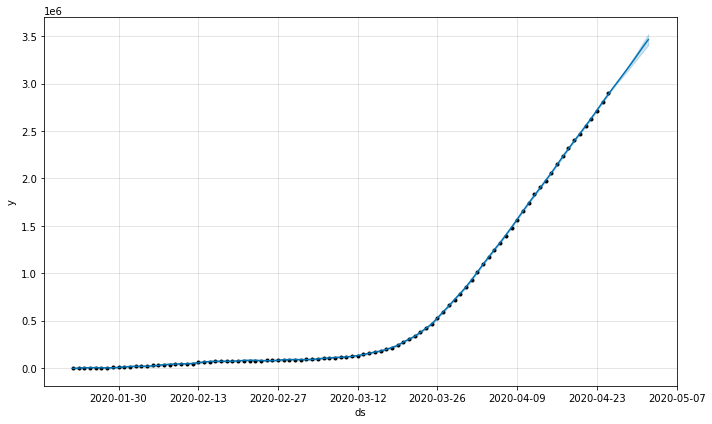

In [29]:
confirmed_forecast_plot = m.plot(forecast)

In [0]:
deaths.columns = ['ds','y']
deaths['ds'] = pd.to_datetime(deaths['ds'])

In [31]:
m = Prophet(interval_width = 0.95)
m.fit(deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
97,2020-04-28
98,2020-04-29
99,2020-04-30
100,2020-05-01
101,2020-05-02


In [32]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
97,2020-04-28,224229.363561,222468.716913,226050.502950
98,2020-04-29,231125.054581,228949.147223,233810.905707
99,2020-04-30,238265.636283,235227.883021,241640.130645
100,2020-05-01,245322.943666,241747.728603,249644.738650
101,2020-05-02,251965.779286,248126.534202,257049.884700


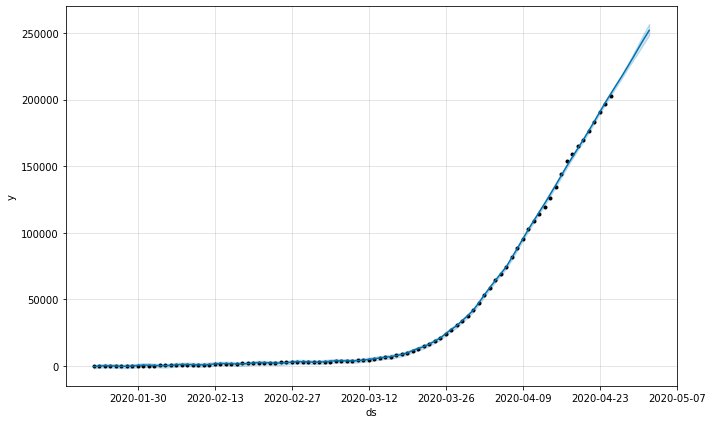

In [33]:
deaths_forecast_plot = m.plot(forecast)

In [0]:
recovered.columns = ['ds','y']
recovered['ds'] = pd.to_datetime(recovered['ds'])

In [35]:
m = Prophet(interval_width = 0.95)
m.fit(recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
97,2020-04-28
98,2020-04-29
99,2020-04-30
100,2020-05-01
101,2020-05-02


In [36]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
97,2020-04-28,852706.627636,842620.804427,862372.490262
98,2020-04-29,880684.135271,869411.997425,892002.621651
99,2020-04-30,907883.963835,894031.546012,920755.226974
100,2020-05-01,935964.468031,918441.678629,952518.948762
101,2020-05-02,963234.367742,943645.093827,983544.587969


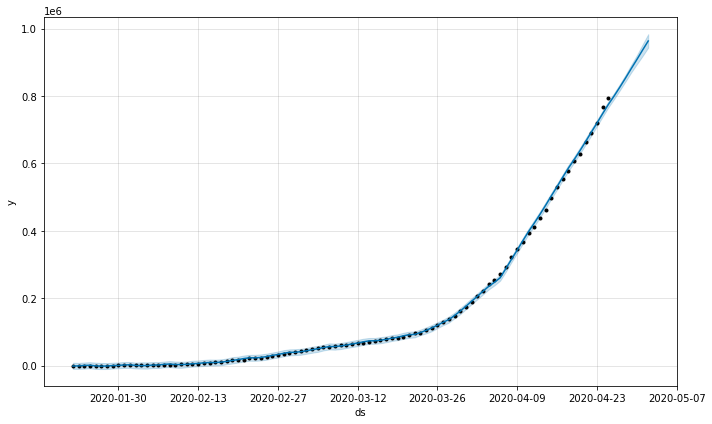

In [37]:
recovered_forecast_plot = m.plot(forecast)

In [0]:
india_confirmed.columns = ['ds','y']
india_confirmed['ds'] = pd.to_datetime(india_confirmed['ds'])

In [39]:
m = Prophet(interval_width = 0.95)
m.fit(india_confirmed)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
97,2020-04-28
98,2020-04-29
99,2020-04-30
100,2020-05-01
101,2020-05-02


In [40]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
97,2020-04-28,27687.471229,26874.528167,28441.820780
98,2020-04-29,28779.195152,27933.940646,29670.459572
99,2020-04-30,29924.199700,29015.667003,30762.449126
100,2020-05-01,31012.122392,30081.226253,31982.710588
101,2020-05-02,32183.771867,31139.793561,33341.529605


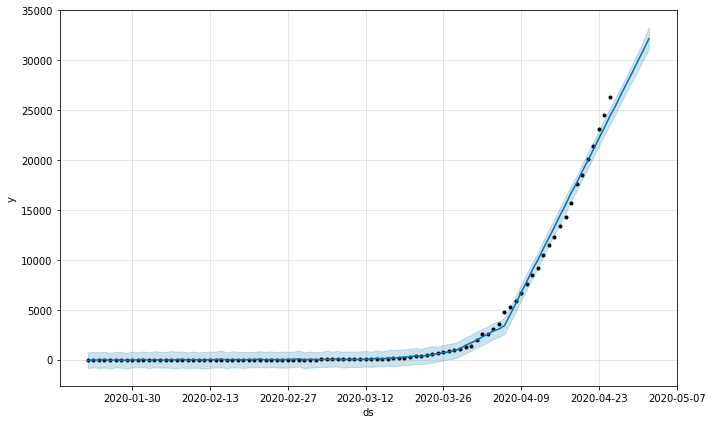

In [41]:
india_confirmed_forecast_plot = m.plot(forecast)

In [0]:
india_deaths.columns = ['ds','y']
india_deaths['ds'] = pd.to_datetime(india_deaths['ds'])

In [43]:
m = Prophet(interval_width = 0.95)
m.fit(india_deaths)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
97,2020-04-28
98,2020-04-29
99,2020-04-30
100,2020-05-01
101,2020-05-02


In [44]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
97,2020-04-28,893.205136,878.510983,907.937925
98,2020-04-29,927.729194,910.713409,945.274572
99,2020-04-30,965.890709,947.032419,984.271199
100,2020-05-01,1001.490141,977.517214,1025.064396
101,2020-05-02,1038.277932,1009.751321,1064.917060


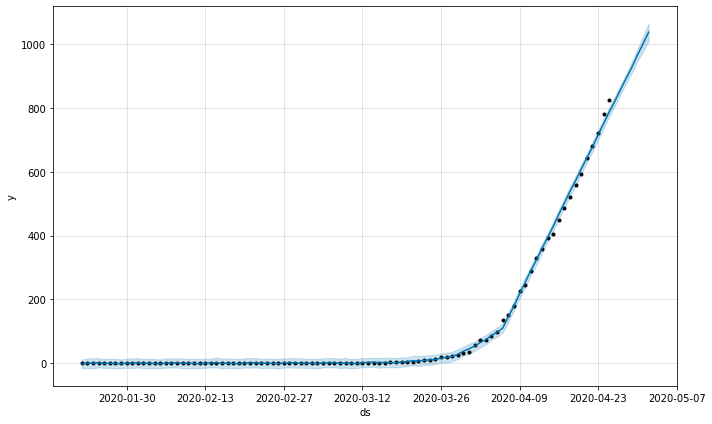

In [45]:
india_deaths_forecast_plot = m.plot(forecast)

In [0]:
india_recovered.columns = ['ds','y']
india_recovered['ds'] = pd.to_datetime(india_recovered['ds'])

In [47]:
m = Prophet(interval_width = 0.95)
m.fit(india_recovered)
future = m.make_future_dataframe(periods=7)
future.tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds
97,2020-04-28
98,2020-04-29
99,2020-04-30
100,2020-05-01
101,2020-05-02


In [48]:
forecast = m.predict(future)
forecast[['ds','yhat','yhat_lower','yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
97,2020-04-28,5332.037928,4788.292615,5862.204445
98,2020-04-29,5564.363610,5029.088455,6136.247970
99,2020-04-30,5833.281890,5273.544130,6444.501848
100,2020-05-01,6088.556706,5525.053279,6687.015653
101,2020-05-02,6355.399305,5799.116238,6927.840256


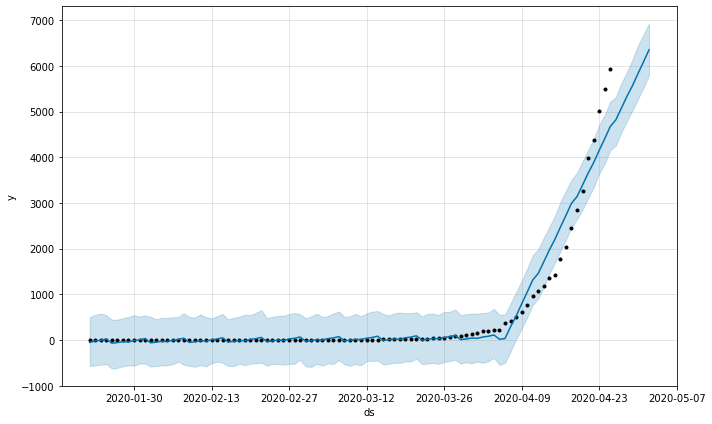

In [49]:
india_recovered_forecast_plot = m.plot(forecast)